<a href="https://colab.research.google.com/github/Bahaakhalled/Insights-Failed-Orders-Gett-Strata/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <p style="background-color:orange;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">Failed Orders on Gett (Taxi App): EDA</p>
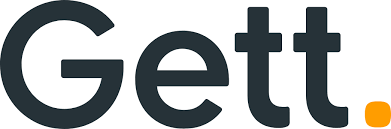

**<span style="color:teal;"> Gett The Taxi Application </span>** Gett is a UK based Taxi ordering Application who wanted a study of the reason taxi orders are being cancelled, this task is part of a Take home assignment the company provides as an interview process at their company and has shared on [Stratascratch](https://www.stratascratch.com/) a website that further helps Data Scientists with Data Projects from companies like Gett and much more. I have created this notebook in attempt to solve their take home-assignment by analysing Failed orders in the data they have provided.




# <p style="background-color:orange;font-family:newtimeroman;color:white;text-align:center;font-size:120%;border-radius:20px 60px;">Table Of Contents</p>

* **Importing Library**
* **Loading data**
* **Data Visualization**

# <p style="background-color:orange;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">Importing Libraries</p>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

 # <p style="background-color:orange;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">Loading Data</p>
 
 **About the data:**
 We have two data sets: data_orders and data_offers, both being stored in a CSV format. 
 
 **The data_orders data set contains the following columns:**

* order_datetime - time of the order
* origin_longitude - longitude of the order
* origin_latitude - latitude of the order
* m_order_eta - time before order arrival
* order_gk - order number
* order_status_key - status, an enumeration consisting of the following mapping:
4 - cancelled by client,
9 - cancelled by system, i.e., a reject
* is_driver_assigned_key - whether a driver has been assigned
* cancellation_time_in_seconds - how many seconds passed before cancellation

**The data_offers data set is a simple map with 2 columns:**

* order_gk - order number, associated with the same column from the orders data set
* offer_id - ID of an offer


In [2]:
my_file = Path("data_orders.csv")
if my_file.is_file()==False:
  !wget 'https://raw.githubusercontent.com/Bahaakhalled/Insights-Failed-Orders-Gett-Strata/main/data_offers.csv'
  !wget 'https://raw.githubusercontent.com/Bahaakhalled/Insights-Failed-Orders-Gett-Strata/main/data_orders.csv'

--2022-10-13 15:00:24--  https://raw.githubusercontent.com/Bahaakhalled/Insights-Failed-Orders-Gett-Strata/main/data_offers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9027818 (8.6M) [text/plain]
Saving to: ‘data_offers.csv’

data_offers.csv     100%[===================>]   8.61M  --.-KB/s    in 0.07s   

2022-10-13 15:00:24 (121 MB/s) - ‘data_offers.csv’ saved [9027818/9027818]

--2022-10-13 15:00:25--  https://raw.githubusercontent.com/Bahaakhalled/Insights-Failed-Orders-Gett-Strata/main/data_orders.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, await

In [3]:
order=pd.read_csv('data_orders.csv')
offer=pd.read_csv('data_offers.csv')

 # <p style="background-color:orange;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">Data Visualization</p>


Outliers at order_Eta and cancellation time in seconds

In [4]:
offer=offer.groupby('order_gk').count().reset_index()

In [5]:
order_offer=order.merge(offer,how='outer', left_on='order_gk', right_on='order_gk')
order_offer = order_offer[order_offer['order_datetime'].notna()]

In [6]:
order_offer.describe()

,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id
count,10716.000000,10716.000000,2814.000000,1.071600e+04,10716.000000,10716.000000,7307.000000,7610.000000
mean,-0.964323,51.450541,441.415423,3.000598e+12,5.590612,0.262598,157.892021,4.108804
std,0.022818,0.011984,288.006379,2.396261e+07,2.328845,0.440066,213.366963,2.456131
min,-1.066957,51.399323,60.000000,3.000550e+12,4.000000,0.000000,3.000000,1.000000
25%,-0.974363,51.444643,233.000000,3.000583e+12,4.000000,0.000000,45.000000,2.000000
50%,-0.966386,51.451972,368.500000,3.000595e+12,4.000000,0.000000,98.000000,4.000000
75%,-0.949605,51.456725,653.000000,3.000623e+12,9.000000,1.000000,187.500000,6.000000
max,-0.867088,51.496169,1559.000000,3.000633e+12,9.000000,1.000000,4303.000000,9.000000


Task 1:Build up distribution of orders according to reasons for failure: cancellations before and after driver assignment, and reasons for order rejection

<AxesSubplot:xlabel='order_status_key,is_driver_assigned_key'>

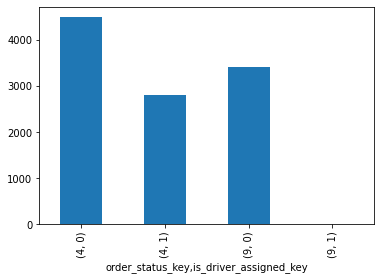

In [7]:
order.groupby(['order_status_key','is_driver_assigned_key']).order_gk.count().plot.bar()

Cancellatations by order:-

1)Client with no drivers assigned

2)Client with drivers assigned

3)System with no drivers assigned

Task 2:Plot the distribution of failed orders by hours. Is there a trend that certain hours have an abnormally high proportion of one category or another? What hours are the biggest fails? How can this be explained?

Text(0.5, 1.0, 'Hourly Cancellation Count')

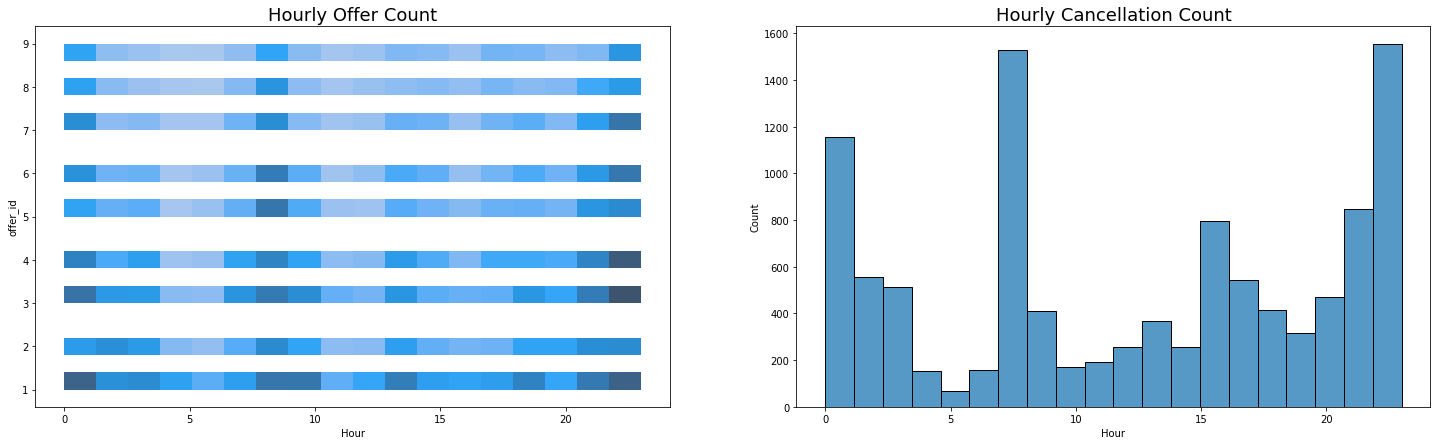

In [8]:
order_offer['Hour']=order_offer.order_datetime.str.split(':', 1,expand=True)[0].astype('int64')

plot , ax = plt.subplots(1 , 2 , figsize = (25 , 7))

sns.histplot(data=order_offer.sort_values(by='Hour',ascending=True), x="Hour", y="offer_id",ax=ax[0]).axes.set_title('Hourly Offer Count',fontsize=18)

sns.histplot(data=order_offer.sort_values(by='Hour',ascending=True), x="Hour",ax=ax[1]).axes.set_title('Hourly Cancellation Count',fontsize=18)

<AxesSubplot:xlabel='order_gk'>

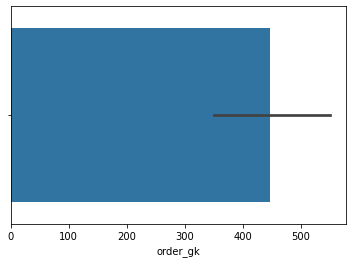

In [9]:
sns.barplot(x=order_offer.groupby('Hour').order_gk.count())
#.reset_index().Hour.plot.bar()

Based on the previous Graphs we found peak cancellations  on 

Text(0.5, 1.0, 'Hourly Average Cancellation Time per driver assignment')

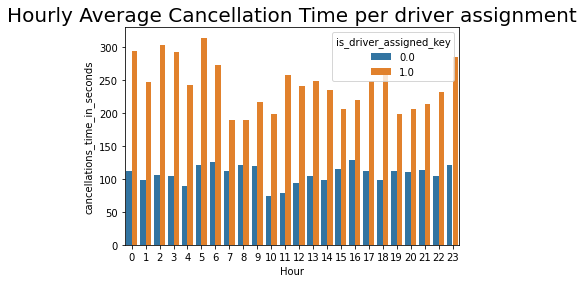

In [10]:
sns.barplot(data=order_offer.groupby(['Hour','is_driver_assigned_key']).cancellations_time_in_seconds.mean().reset_index(),x='Hour',y='cancellations_time_in_seconds',hue='is_driver_assigned_key').axes.set_title('Hourly Average Cancellation Time per driver assignment',fontsize=20)

<AxesSubplot:title={'center':'AVG Cancellation Time per Hour'}>

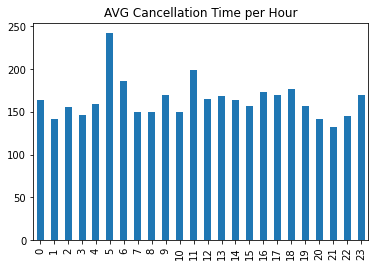

In [11]:
order_offer.groupby('Hour').cancellations_time_in_seconds.mean().reset_index().sort_values(by='Hour',ascending=True).cancellations_time_in_seconds.plot(kind='bar',title='AVG Cancellation Time per Hour')

In [12]:
order_offer['order_status_key']=order_offer.order_status_key.map(lambda m:'Client' if m==4 else 'System' )
order_offer['got_offer']=order_offer.offer_id.map(lambda m:1 if m>0 else 0 )

order_offer.groupby(['order_status_key','is_driver_assigned_key']).sum()

origin_longitude  origin_latitude  \
order_status_key is_driver_assigned_key                                      
Client           0.0                         -4336.798715    231323.005872   
                 1.0                         -2707.295188    144626.216720   
System           0.0                         -3286.671424    175240.402698   
                 1.0                            -2.922420       154.374164   

                                         m_order_eta           order_gk  \
order_status_key is_driver_assigned_key                                   
Client           0.0                             0.0  13490694397154540   
                 1.0                       1241367.0   8434669160015600   
System           0.0                             0.0  10220045065741036   
                 1.0                           776.0      9001861525196   

                                         cancellations_time_in_seconds  \
order_status_key is_driver_assigned_key                                  
Client           0.0                                          496230.0   
                 1.0                                          657487.0   
System           0.0                                               0.0   
                 1.0                                               0.0   

                                         offer_id   Hour  got_offer  
order_status_key is_driver_assigned_key                              
Client           0.0                      13435.0  57213       3367  
                 1.0                       8360.0  35192       2338  
System           0.0                       9469.0  40405       1903  
                 1.0                          4.0     16          2

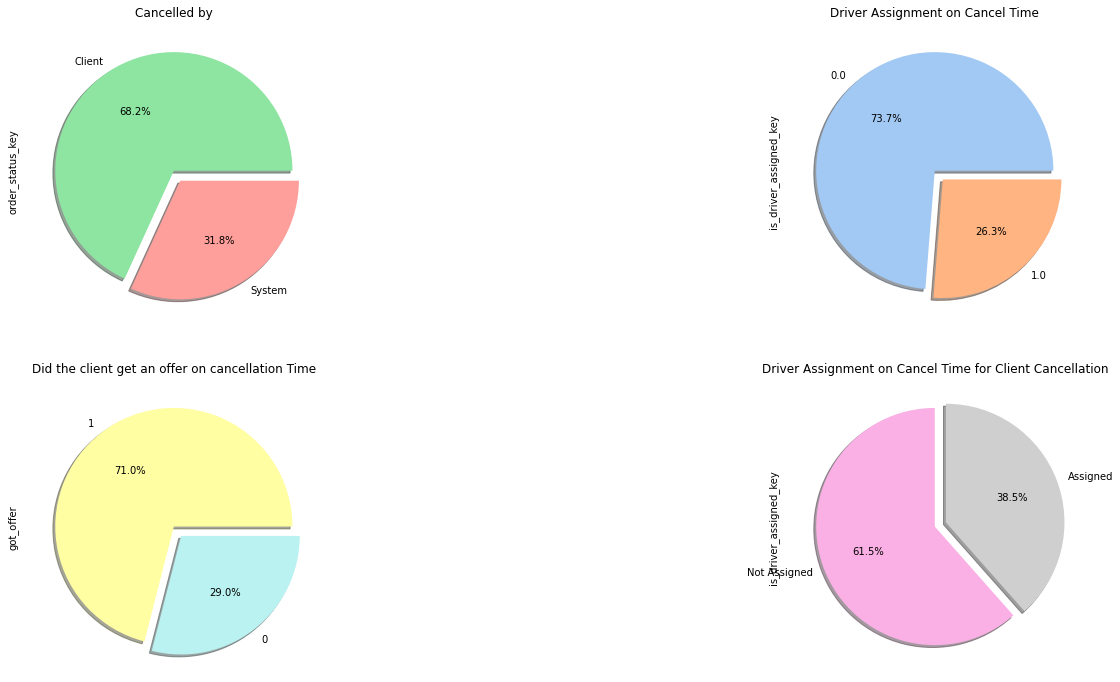

In [13]:
plot , ax = plt.subplots(2 , 2 , figsize = (25 , 12))

explode = (0, 0.1) 
order_offer.order_status_key.value_counts().plot.pie(autopct='%1.1f%%',colors = sns.color_palette('pastel')[2:4],shadow=True,explode=explode,ax=ax[0][0])
ax[0][0].title.set_text('Cancelled by')
order_offer.is_driver_assigned_key.value_counts().plot.pie(autopct='%1.1f%%',colors = sns.color_palette('pastel'),shadow=True,explode=explode,ax=ax[0][1])
ax[0][1].title.set_text('Driver Assignment on Cancel Time')
order_offer.got_offer.value_counts().plot.pie(autopct='%1.1f%%',colors = sns.color_palette('pastel')[8:10],shadow=True,explode=explode,ax=ax[1][0])

ax[1][0].title.set_text('Did the client get an offer on cancellation Time')

order_offer.loc[order_offer['order_status_key']=='Client'].is_driver_assigned_key.value_counts().plot.pie(labels=['Not Assigned','Assigned'],autopct='%1.1f%%',shadow=True,colors = sns.color_palette('pastel')[6:8], startangle=90,explode=explode,ax=ax[1][1])
ax[1][1].title.set_text('Driver Assignment on Cancel Time for Client Cancellation')


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Cancellation Time'}, xlabel='cancellations_time_in_seconds'>

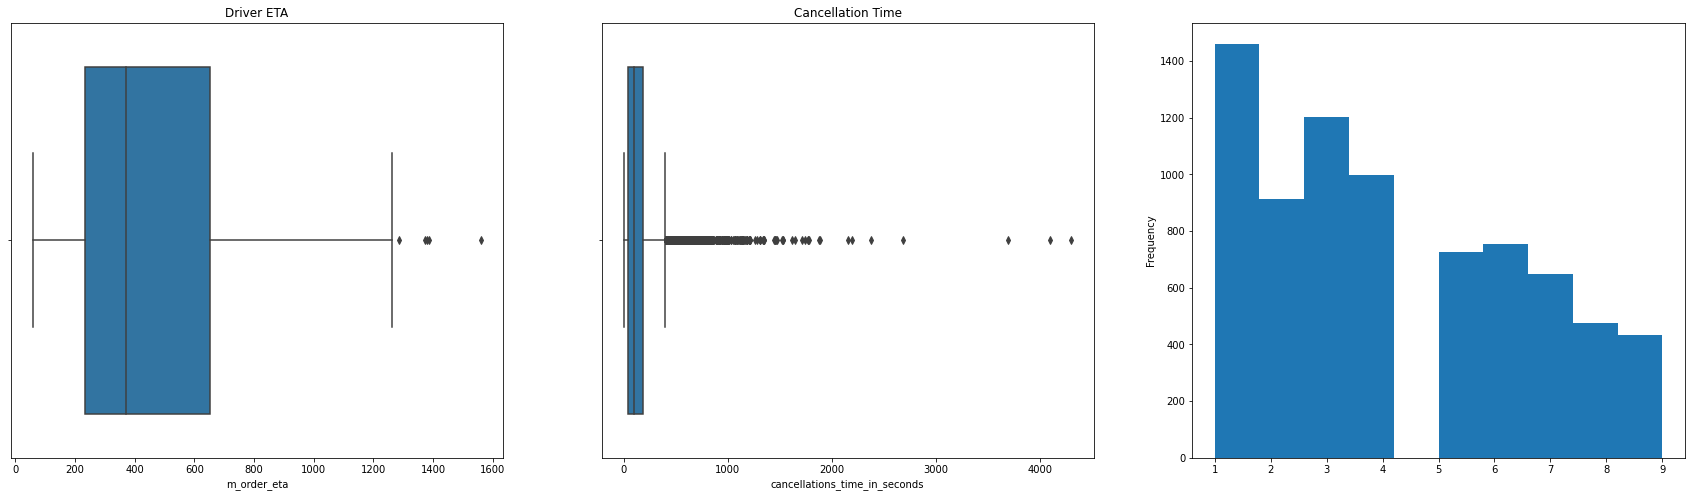

In [14]:
plot , ax = plt.subplots(1 , 3 , figsize = (30 , 8))
order_offer.offer_id.plot(kind='hist',ax=ax[2])
ax[0].title.set_text('Driver ETA')
sns.boxplot(order_offer.loc[order_offer['order_status_key']=='Client'].m_order_eta,ax=ax[0])
ax[1].title.set_text('Cancellation Time')
sns.boxplot(x=order_offer.loc[order_offer['order_status_key']=='Client'].cancellations_time_in_seconds,ax=ax[1])

<AxesSubplot:xlabel='Hour', ylabel='m_order_eta'>

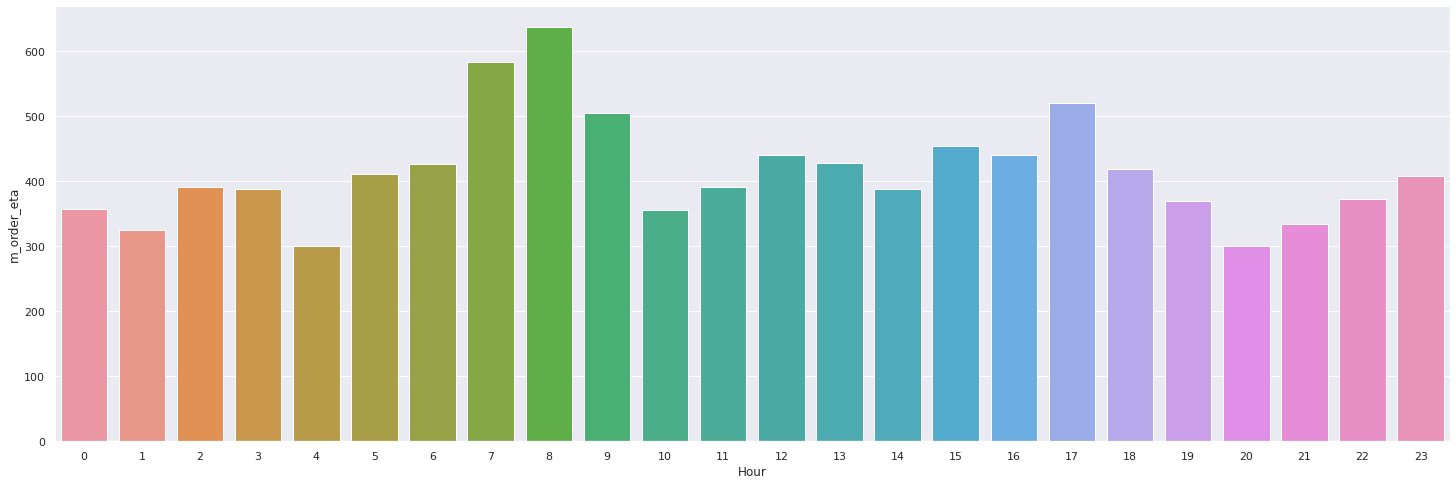

In [15]:
sns.set(rc={"figure.figsize":(25, 8)})
sns.barplot(data=order_offer.groupby('Hour').m_order_eta.mean().reset_index(), x="Hour", y="m_order_eta")

<AxesSubplot:xlabel='origin_longitude', ylabel='origin_latitude'>

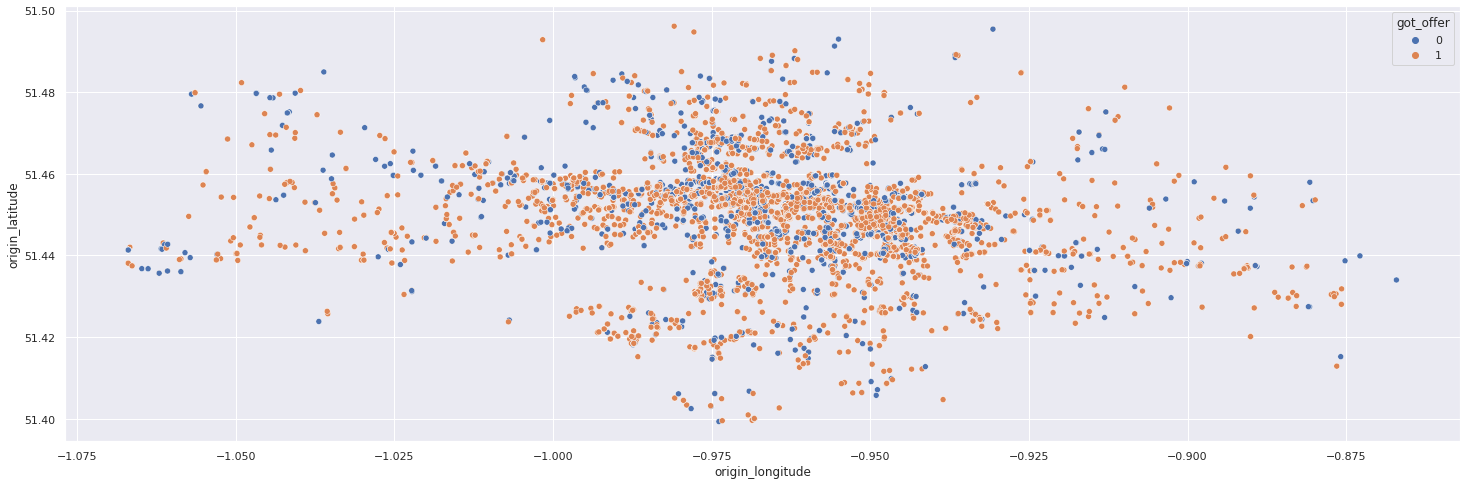

In [16]:
sns.scatterplot(data=order_offer, x="origin_longitude", y="origin_latitude",hue='got_offer')


In [17]:
order_offer.loc[order_offer['order_status_key']=='Client']['m_order_eta'].describe()

count    2811.000000
mean      441.610459
std       288.057123
min        60.000000
25%       233.000000
50%       372.000000
75%       653.500000
max      1559.000000
Name: m_order_eta, dtype: float64

Half of Client Cancellations are less than 6 minutes of waiting for order time

In [18]:
no_offer=order_offer.loc[order_offer['offer_id'].isnull()].reset_index(drop=True)
no_offer['Hour']=no_offer.order_datetime.str.split(':', 1,expand=True)[0].astype('int64')

In [19]:
no_offer['Timing']=no_offer.Hour.map(lambda m:'AM' if m<12 else 'PM' )
no_offer

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id,Hour,got_offer,Timing
0,21:24:45,-0.967605,51.458236,NaN,3000583140877,System,0.0,NaN,NaN,21,0,PM
1,07:53:46,-0.978230,51.454575,NaN,3000582791562,System,0.0,NaN,NaN,7,0,AM
2,16:55:28,-0.950683,51.451368,538.0,3000583016613,Client,1.0,188.0,NaN,16,0,PM
3,00:04:16,-0.974519,51.454603,NaN,3000582541301,System,0.0,NaN,NaN,0,0,AM
4,08:49:02,-0.963172,51.454195,NaN,3000582817399,System,0.0,NaN,NaN,8,0,AM
...,...,...,...,...,...,...,...,...,...,...,...,...
3101,13:18:03,-0.972926,51.457693,NaN,3000599187042,Client,0.0,10.0,NaN,13,0,PM
3102,13:14:50,-0.975372,51.457846,NaN,3000599186984,Client,0.0,19.0,NaN,13,0,PM
3103,12:45:23,-0.975372,51.457846,NaN,3000597886178,Client,0.0,23.0,NaN,12,0,PM
3104,13:13:55,-0.975372,51.457846,NaN,3000599186962,Client,0.0,4.0,NaN,13,0,PM
